In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#!pip uninstall matplotlib

In [6]:
#!pip install matplotlib

# 1.1 Import Data
# Let's assume you have a CSV file named 'data.csv' containing your dataset.

In [7]:
data = pd.read_csv('./data/pinterest-fashion-dataset.csv')

In [8]:
data.image_url.to_list()[0]

'http://i.pinimg.com/400x/88/70/b0/8870b0d384138a81cfdc91f98d1dde9b.jpg'

# 1.2 Data Cleaning and Preprocessing
## 1.2.1 Check for missing values and handle them

In [9]:
init_len = len(data)
data = data.dropna(subset=['image_description'])
print(f"Rows with missing 'image_description' removed {init_len - len(data)} times")

# Check for missing values
missing_values = data.isnull().sum()
if missing_values.any():
    print("Missing values before imputation:")
    print(missing_values[missing_values > 0])

    # Fill numerical missing values with the mean of the column
    for col in data.select_dtypes(include=[np.number]).columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].mean(), inplace=True)
            print(f"Filled missing values in {col} with mean value.")

    # Fill categorical missing values with the mode
    for col in data.select_dtypes(include=['object']).columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].mode()[0], inplace=True)
            print(f"Filled missing values in {col} with mode value.")

Rows with missing 'image_description' removed 5 times


In [10]:
len(data)

995

## 1.2.2 Convert price to numeric

In [11]:
data['price in $'] = pd.to_numeric(data['price in $'], errors='coerce')

# 1.3 Exploratory Data Analysis (EDA)
## 1.3.1 Investigate relationships between price, click_rate, and ratings
### Basic statistics for numerical features

In [12]:
print(data.describe())

              age  price in $  click_rate     ratings
count  995.000000  995.000000  995.000000  995.000000
mean    50.067337   59.972161  296.657286    3.025126
std     18.934242   34.085220  115.371285    1.407929
min     20.000000   18.000000  100.000000    1.000000
25%     32.000000   35.250000  199.000000    2.000000
50%     52.000000   50.000000  290.000000    3.000000
75%     66.000000   73.000000  394.000000    4.000000
max     79.000000  200.000000  500.000000    5.000000


### Basic statistics for categorical features

In [13]:
data.describe(include=['O'])

,user_name,gender,location,category,brand,availability,image_url,image_description
count,995,995,995,995,995,995,995,995
unique,10,2,42,10,97,2,995,990
top,Customer_2,Male,Karratha,Shoes,Adidas,Available,http://i.pinimg.com/400x/88/70/b0/8870b0d38413...,Light blue high waisted straight leg jeans wi...
freq,100,506,80,297,42,804,1,2


## 1.3.2 Visualize insights
### Histogram of prices

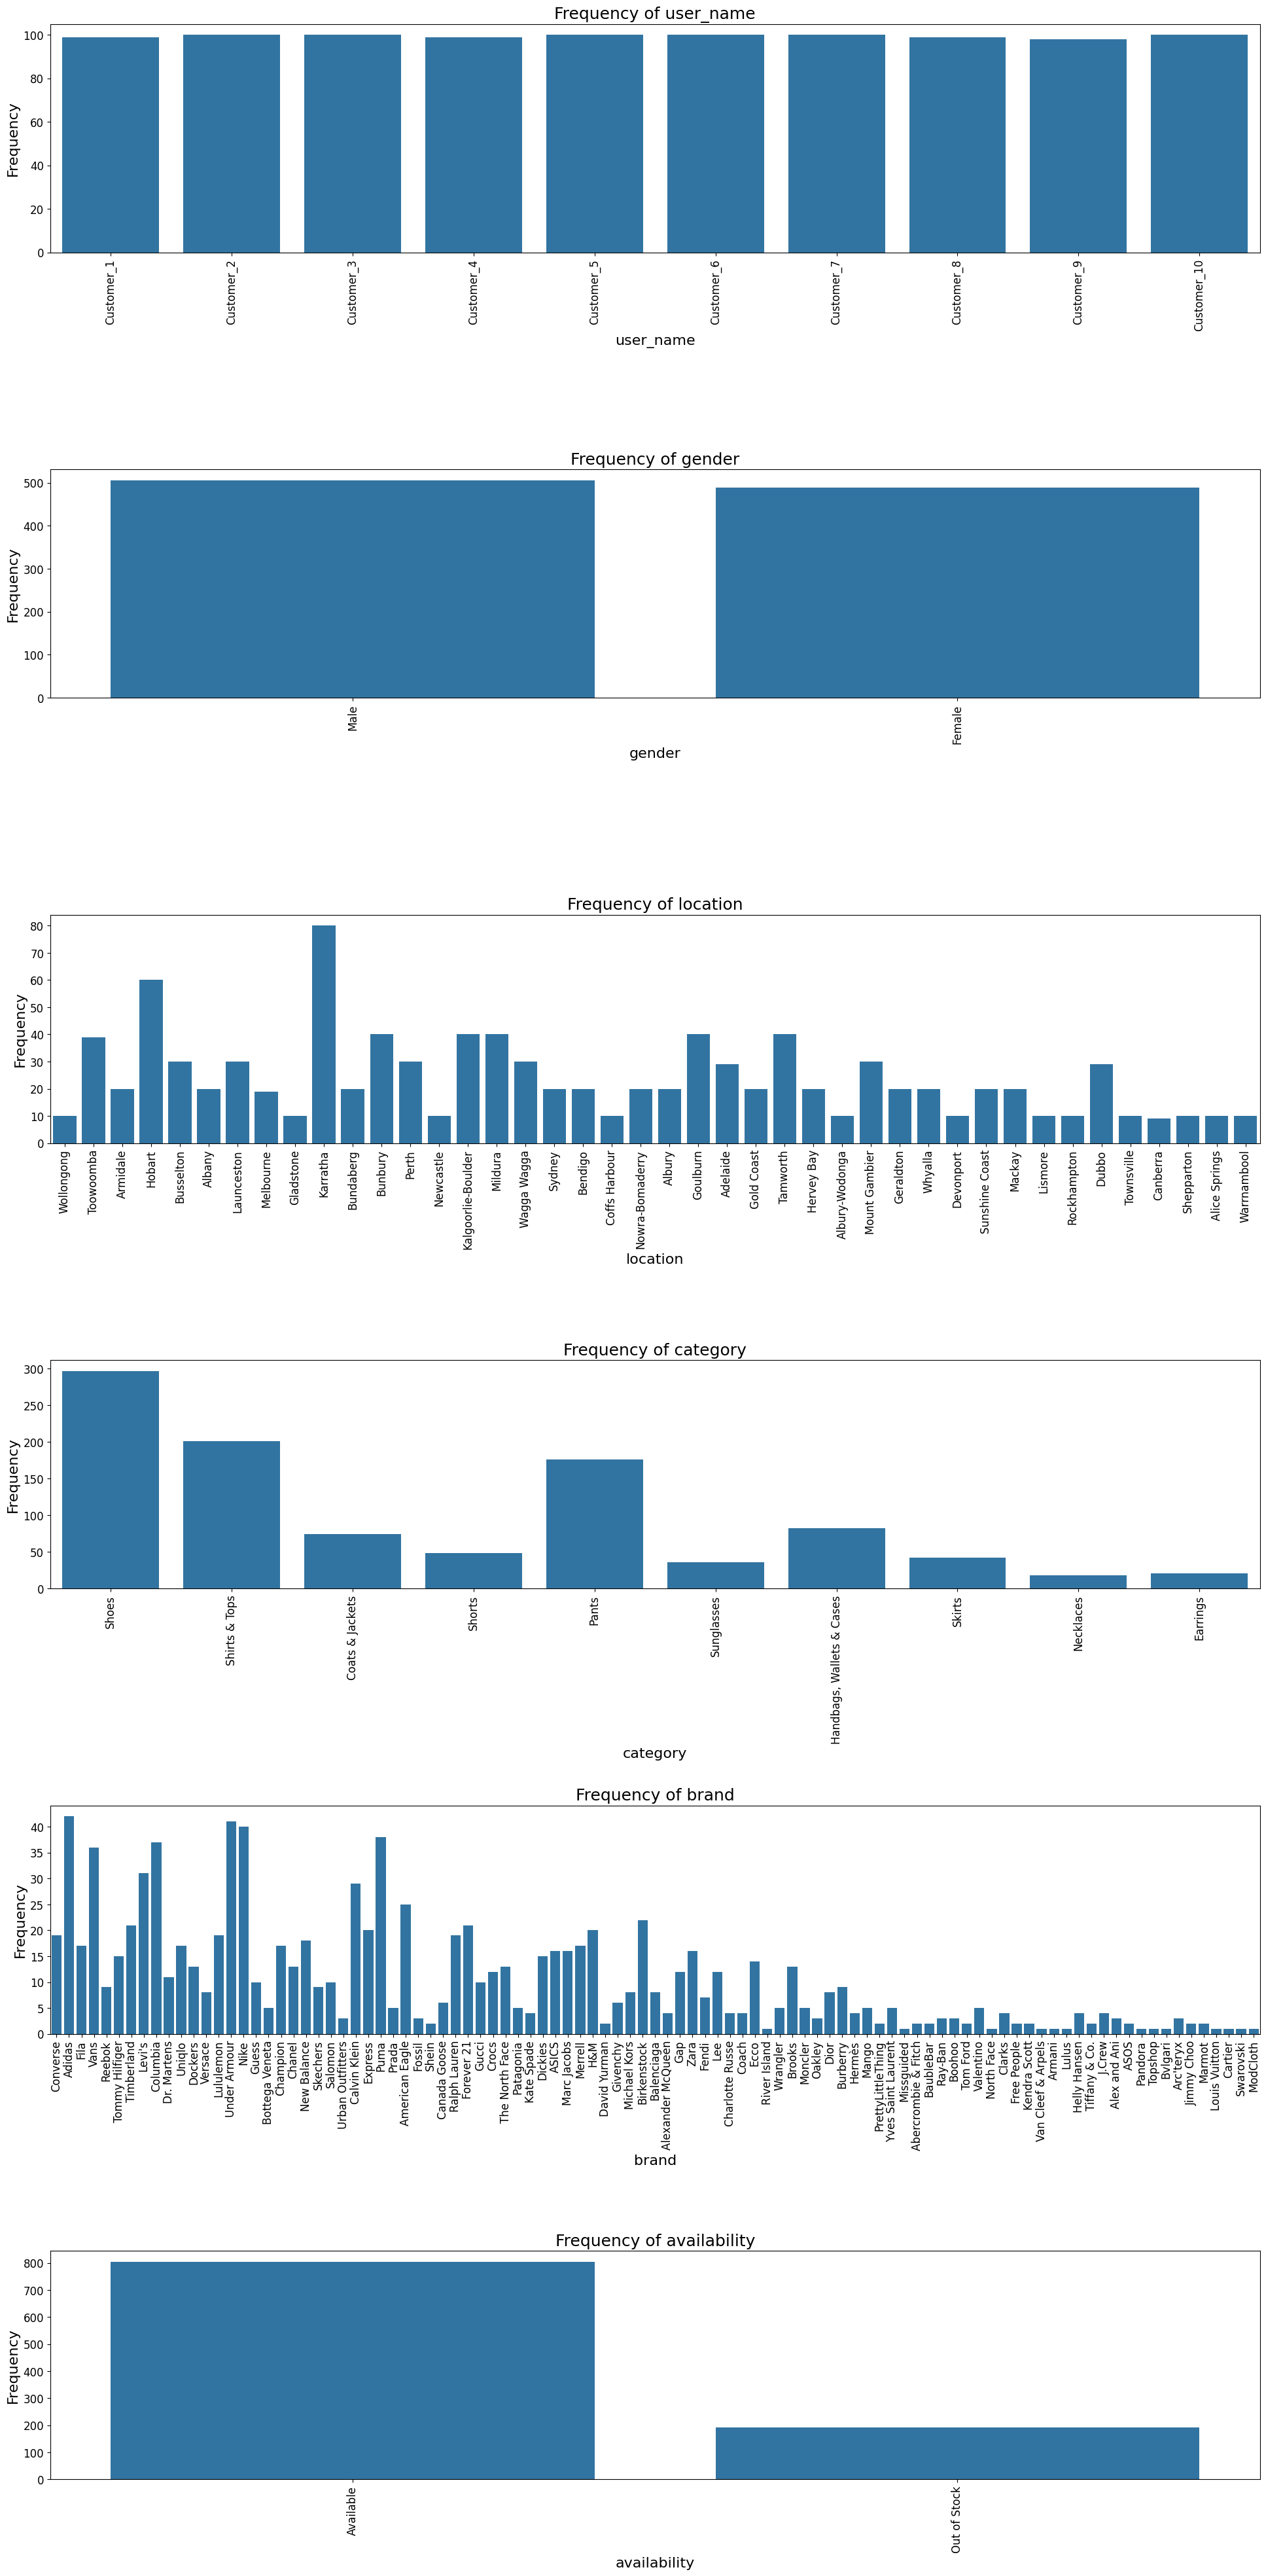

In [14]:
# Define the categorical columns you want to visualize
categorical_columns = ['user_name','gender', 'location', 'category', 'brand', 'availability']

# Set up the matplotlib figure, adjust the size for better visibility
plt.figure(figsize=(20, 40))  # Adjust the figure size to better accommodate the single column layout

# Create a subplot for each categorical column
for index, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(len(categorical_columns), 1, index)  # Use a single column layout
    sns.countplot(x=column, data=data, ax=ax)
    ax.set_title(f'Frequency of {column}', fontsize=18)  # Increase the font size for the plot title
    ax.set_xlabel(f'{column}', fontsize=16)  # Increase the font size for the x-axis label
    ax.set_ylabel('Frequency', fontsize=16)  # Increase the font size for the y-axis label
    ax.tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels to vertical and increase label size
    ax.tick_params(axis='y', labelsize=12)  # Increase y-axis label size

plt.tight_layout(pad=3.0)  # Adjust layout to make room for titles and labels
plt.show()

In [15]:
#!pip install --upgrade seaborn

/tmp/ipykernel_48535/2597139362.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price in $'], bins=30, kde=True, hist=True)  # distplot with histogram and KDE


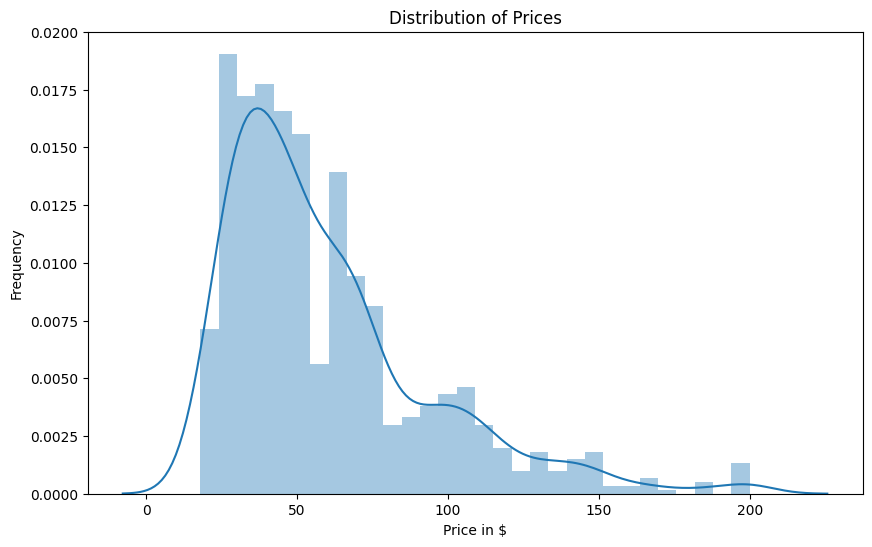

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
sns.distplot(data['price in $'], bins=30, kde=True, hist=True)  # distplot with histogram and KDE
plt.title('Distribution of Prices')
plt.xlabel('Price in $')
plt.ylabel('Frequency')
plt.show()

### Scatter plot for price vs click_rate

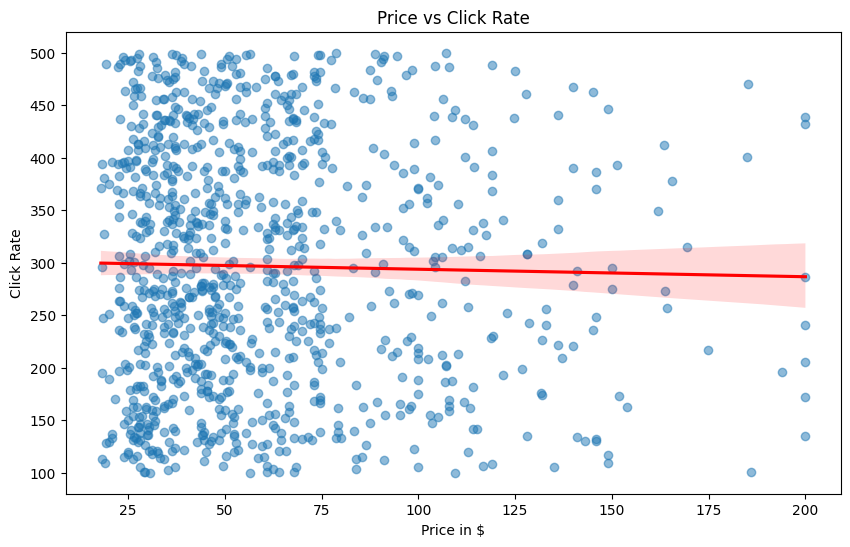

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
# Adding a regression line to the scatter plot
sns.regplot(x='price in $', y='click_rate', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs Click Rate')
plt.xlabel('Price in $')
plt.ylabel('Click Rate')
plt.show()

### Boxplot for ratings

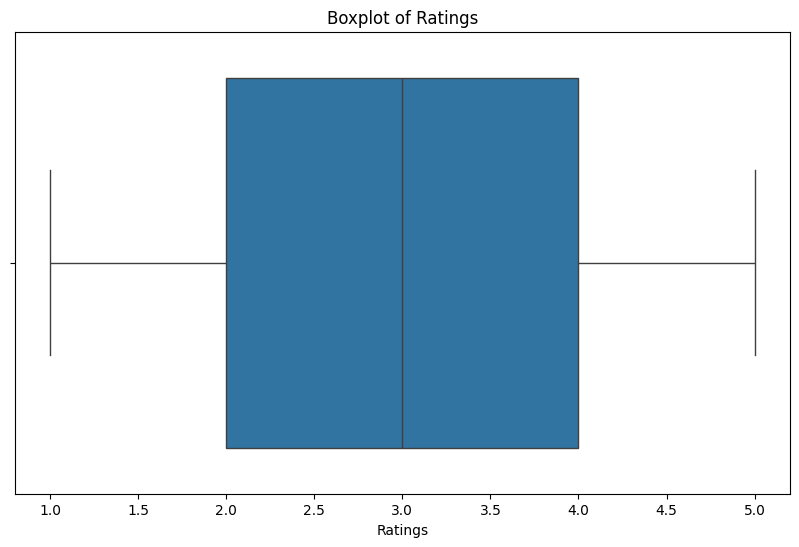

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ratings', data=data)
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()

# 1.4 Reporting
## Generate a report - for simplicity, this is a text summary; you can use Markdown or other tools for more comprehensive reporting.

In [19]:
report = """
## Data Analysis Report

### Data Summary
- The data consists of {0} rows and {1} columns.
- Missing values were handled by imputing the mean for numerical columns and the mode for categorical columns.

### Price Analysis
- The average price of items in the dataset is approximately ${2:.2f}.
- Prices range from ${3:.2f} to ${4:.2f}.

### Click Rate Analysis
- Average click rate observed: {5:.2f}

### Ratings Analysis
- Average rating: {6:.2f}
- Ratings range from {7} to {8}.

### Visual Insights
Refer to the attached visualizations for more details on the distribution of prices, the relationship between price and click rate, and the distribution of ratings.

""".format(len(data), len(data.columns), data['price in $'].mean(), data['price in $'].min(), 
           data['price in $'].max(), data['click_rate'].mean(), data['ratings'].mean(),
           data['ratings'].min(), data['ratings'].max())

print(report)


## Data Analysis Report

### Data Summary
- The data consists of 995 rows and 12 columns.
- Missing values were handled by imputing the mean for numerical columns and the mode for categorical columns.

### Price Analysis
- The average price of items in the dataset is approximately $59.97.
- Prices range from $18.00 to $200.00.

### Click Rate Analysis
- Average click rate observed: 296.66

### Ratings Analysis
- Average rating: 3.03
- Ratings range from 1 to 5.

### Visual Insights
Refer to the attached visualizations for more details on the distribution of prices, the relationship between price and click rate, and the distribution of ratings.




In [20]:
len(data)

995

In [21]:
data.to_csv("./data/pinterest-fashion-dataset_preprocessed.csv")

,user_name,age,gender,location,category,brand,price in $,click_rate,availability,ratings,image_url,image_description
0,Customer_1,63,Male,Wollongong,Shoes,Converse,66.5,164,Available,5,http://i.pinimg.com/400x/88/70/b0/8870b0d38413...,These are white canvas lace-up sneakers with ...
1,Customer_2,63,Male,Wollongong,Shoes,Adidas,93.1,459,Available,2,http://i.pinimg.com/400x/c3/1d/1e/c31d1e4b326c...,These are women's wedge sandals with a black ...
2,Customer_3,63,Male,Wollongong,Shoes,Fila,66.5,402,Out of Stock,1,http://i.pinimg.com/400x/48/a5/ab/48a5abadc1ce...,A pair of checkerboard slip-on shoes from Van...
3,Customer_4,63,Male,Wollongong,Shoes,Vans,66.5,209,Available,3,http://i.pinimg.com/400x/89/4e/76/894e763a9fe3...,"These are white leather mules with a unique, ..."
4,Customer_5,63,Male,Wollongong,Shoes,Reebok,66.5,455,Available,3,http://i.pinimg.com/400x/61/94/55/619455144ff4...,These white leather slingback shoes are perfe...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Customer_6,32,Male,Tamworth,Skirts,ModCloth,35.7,224,Available,2,http://i.pinimg.com/400x/00/19/1f/00191f9d01d2...,"A red and white striped, high waisted, asymme..."
996,Customer_7,32,Male,Tamworth,Shirts & Tops,Levi's,25.5,308,Available,1,http://i.pinimg.com/400x/d0/5e/9f/d05e9fa12a01...,"A black, round neck, cropped blouse with long..."
997,Customer_8,32,Male,Tamworth,Shirts & Tops,Tommy Hilfiger,25.5,492,Out of Stock,2,http://i.pinimg.com/400x/c8/1c/13/c81c13cf36dc...,A black v-neck sleeveless t-shirt with a pock...
998,Customer_9,32,Male,Tamworth,Pants,Dickies,30.6,100,Available,4,http://i.pinimg.com/400x/0c/e7/b5/0ce7b5beff06...,"Light blue, high-waisted, straight-leg jeans ..."
